## Reading Text Document

In [1]:
messages = [line for line in open('SMSSpamCollection')]
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim ca

In [2]:
len(messages)

5574

In [3]:
for message_no, message in enumerate(messages[:5]):
    print (message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though



## Converting into Pandas CSV

In [4]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [32]:
messages = pd.read_csv("SMSSpamCollection", sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [33]:
messages = pd.read_csv("SMSSpamCollection", sep='\t',
                           names=["label", "message"])
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [36]:
messages.message.values[5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

## Exploring Textual Data 

In [7]:
print("Aggregate statistics of messages :")
messages.groupby('label').describe()

Aggregate statistics of messages :


message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Length of the messages

In [8]:
print("Length of initial few messages :")
messages['length'] = messages['message'].map(lambda text: len(text))
messages.head()

Length of initial few messages :


label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [9]:
print(messages.length.describe())

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64


In [10]:
print (list(messages.message[messages.length > 900]))

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


## Tokenization

In [11]:
from textblob import TextBlob
def split_into_tokens(message):
    return TextBlob(message).words

In [12]:
TextBlob("machine learning class of simplilearn").words

WordList(['machine', 'learning', 'class', 'of', 'simplilearn'])

In [13]:
print("Tokenized messages :")
print(messages.message.head().apply(split_into_tokens))

Tokenized messages :
0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, do, n't, think, he, goes, to, usf, he...
Name: message, dtype: object


## Part of Speech Tags

In [14]:
print("Word, Part of Speech POS tag for sentence 'Hello world, how is it going?' :")
print(TextBlob("Hello world, how is it going?").tags)  # list of (word, POS) pairs

Word, Part of Speech POS tag for sentence 'Hello world, how is it going?' :
[('Hello', 'NNP'), ('world', 'NN'), ('how', 'WRB'), ('is', 'VBZ'), ('it', 'PRP'), ('going', 'VBG')]


## Lemmatization

In [15]:
def split_into_lemmas(message):
    words = TextBlob(message).words
    lemma_form = [word.lemma for word in words]
    return lemma_form

## Lemma form examples
some examples

In [16]:
print("After lemmatization, the messages are :")
print(messages.message.head().apply(split_into_lemmas))

After lemmatization, the messages are :
0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, do, n't, think, he, go, to, usf, he, ...
Name: message, dtype: object


In [17]:
print ("Data to vectors - Convert the messages to a matrix of token counts")
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['message'])
print(len(bow_transformer.vocabulary_))

Data to vectors - Convert the messages to a matrix of token counts
11012


In [18]:
message4 = messages['message'][3]
print (message4)

U dun say so early hor... U c already then say...


In [19]:
print("After Bag of Words and conversion to vector, above text message :")
bow4 = bow_transformer.transform([message4])
print (bow4)
print("Shape of Bag of Words :")
print (bow4.shape)

After Bag of Words and conversion to vector, above text message :
  (0, 4191)	2
  (0, 4764)	1
  (0, 5365)	1
  (0, 6221)	1
  (0, 6245)	1
  (0, 7139)	1
  (0, 9282)	2
  (0, 9591)	1
  (0, 10056)	1
Shape of Bag of Words :
(1, 11012)


In [20]:
print("Sanity check: what are these words that appear twice :")
print (bow_transformer.get_feature_names()[6245])
print (bow_transformer.get_feature_names()[4191])
print (bow_transformer.get_feature_names()[9282])

Sanity check: what are these words that appear twice :
early
U
say


In [21]:
print ("Using the bag of words transformer, transform all the messages :")
messages_bow = bow_transformer.transform(messages['message'])
print ('sparse matrix shape:', messages_bow.shape)
print ('number of non-zeros:', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Using the bag of words transformer, transform all the messages :
sparse matrix shape: (5572, 11012)
number of non-zeros: 81622
sparsity: 0.13%


## TFIDF Vectorizer

In [22]:
print("Now perform TFIDF fit and transform")
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print("After TFIDF fit and transformation, above text message :")
print (tfidf4)

Now perform TFIDF fit and transform
After TFIDF fit and transformation, above text message :
  (0, 10056)	0.225101123694
  (0, 9591)	0.195539546867
  (0, 9282)	0.495972597887
  (0, 7139)	0.426944868579
  (0, 6245)	0.310014249199
  (0, 6221)	0.291354653414
  (0, 5365)	0.286079324699
  (0, 4764)	0.258925519628
  (0, 4191)	0.391079093734


Checking IDF Values

In [23]:
print("What is the IDF (inverse document frequency) of the word 'u'and Of word 'university'?:")
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

What is the IDF (inverse document frequency) of the word 'u'and Of word 'university'?:
3.18793713783
8.5270764989


In [24]:
print("Transform the entire bag-of-words corpus into TF-IDF corpus at once :")
messages_tfidf = tfidf_transformer.transform(messages_bow)
print("After TFIDF transformation, print shape :")
print (messages_tfidf.shape)

Transform the entire bag-of-words corpus into TF-IDF corpus at once :
After TFIDF transformation, print shape :
(5572, 11012)


## Model Training

In [25]:
print ("Now perform MultinomialNB fit to get the Spam Detector")
spam_detector = MultinomialNB().fit(messages_tfidf, messages['label'])
print("Model Trained")

Now perform MultinomialNB fit to get the Spam Detector
Model Trained


## Model Prediction

In [26]:
print("Let's use this spam detector to try to classify our single random message :")
print ('predicted:', spam_detector.predict(tfidf4)[0])
print ('expected:', messages.label[3])

Let's use this spam detector to try to classify our single random message :
predicted: ham
expected: ham


In [27]:
all_predictions = spam_detector.predict(messages_tfidf)
print("Print all predictions :")
print (all_predictions)

Print all predictions :
['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


## Model Evaluation

In [28]:
print ('accuracy of spam predictions', accuracy_score(messages['label'], all_predictions))
print ('confusion matrix\n', confusion_matrix(messages['label'], all_predictions))
print ('(row=expected, col=predicted)')

accuracy of spam predictions 0.972182340273
confusion matrix
 [[4825    0]
 [ 155  592]]
(row=expected, col=predicted)


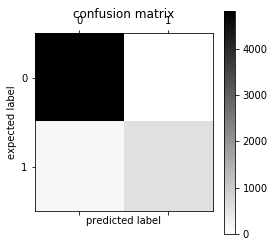

In [29]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(messages['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [30]:
print("From this confusion matrix, we can compute precision and recall, or their combination (harmonic mean) F1")
print (classification_report(messages['label'], all_predictions))

From this confusion matrix, we can compute precision and recall, or their combination (harmonic mean) F1
             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      4825
       spam       1.00      0.79      0.88       747

avg / total       0.97      0.97      0.97      5572

